In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Importing the Dataset

In [2]:
# Encoding the STring values

In [3]:
df = pd.read_csv('Dataset.csv')
df_dict = pd.read_csv("Data Dictionary.csv") # it contains the description of dataset

In [4]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [5]:
df.shape

(91713, 186)

In [6]:
df.info(show_counts=True,verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   hospital_admit_source          70304 non-null  object 
 11   icu_admit_source               91601 non-null  object 
 12   icu_id                        

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()[df.isna().sum() != 0].head(175).reset_index().sort_values(by = 0,ascending=False).values

array([['h1_bilirubin_max', 84619],
       ['h1_bilirubin_min', 84619],
       ['h1_lactate_min', 84369],
       ['h1_lactate_max', 84369],
       ['h1_albumin_max', 83824],
       ['h1_albumin_min', 83824],
       ['h1_pao2fio2ratio_min', 80195],
       ['h1_pao2fio2ratio_max', 80195],
       ['h1_arterial_ph_min', 76424],
       ['h1_arterial_ph_max', 76424],
       ['h1_hco3_min', 76094],
       ['h1_hco3_max', 76094],
       ['h1_arterial_pco2_min', 75959],
       ['h1_arterial_pco2_max', 75959],
       ['h1_wbc_max', 75953],
       ['h1_wbc_min', 75953],
       ['h1_arterial_po2_max', 75945],
       ['h1_arterial_po2_min', 75945],
       ['h1_calcium_min', 75863],
       ['h1_calcium_max', 75863],
       ['h1_platelets_max', 75673],
       ['h1_platelets_min', 75673],
       ['h1_bun_min', 75091],
       ['h1_bun_max', 75091],
       ['h1_creatinine_min', 74957],
       ['h1_creatinine_max', 74957],
       ['h1_diasbp_invasive_max', 74928],
       ['h1_diasbp_invasive_min', 74928]

Lets keep an upper limit of 10k (i.e. number of null values in that column), more than this upper limit are dropping this column

In [9]:
cols_to_be_dropped = df.isna().sum()[df.isna().sum() >10000].index.to_list()

In [10]:
df.drop(cols_to_be_dropped,axis= 1,inplace=True)

In [11]:
df.shape

(91713, 85)

In [12]:
df.isna().sum().reset_index().values

array([['encounter_id', 0],
       ['patient_id', 0],
       ['hospital_id', 0],
       ['hospital_death', 0],
       ['age', 4228],
       ['bmi', 3429],
       ['elective_surgery', 0],
       ['ethnicity', 1395],
       ['gender', 25],
       ['height', 1334],
       ['icu_admit_source', 112],
       ['icu_id', 0],
       ['icu_stay_type', 0],
       ['icu_type', 0],
       ['pre_icu_los_days', 0],
       ['readmission_status', 0],
       ['weight', 2720],
       ['apache_2_diagnosis', 1662],
       ['apache_3j_diagnosis', 1101],
       ['apache_post_operative', 0],
       ['arf_apache', 715],
       ['gcs_eyes_apache', 1901],
       ['gcs_motor_apache', 1901],
       ['gcs_unable_apache', 1037],
       ['gcs_verbal_apache', 1901],
       ['heart_rate_apache', 878],
       ['intubated_apache', 715],
       ['map_apache', 994],
       ['resprate_apache', 1234],
       ['temp_apache', 4108],
       ['ventilated_apache', 715],
       ['d1_diasbp_max', 165],
       ['d1_diasbp_min', 165]

In [13]:
df.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   hospital_death                 91713 non-null  int64  
 4   age                            87485 non-null  float64
 5   bmi                            88284 non-null  float64
 6   elective_surgery               91713 non-null  int64  
 7   ethnicity                      90318 non-null  object 
 8   gender                         91688 non-null  object 
 9   height                         90379 non-null  float64
 10  icu_admit_source               91601 non-null  object 
 11  icu_id                         91713 non-null  int64  
 12  icu_stay_type                  91713 non-null 

In [14]:
string_cols = []
for i in df.select_dtypes(include='object'):
    string_cols.append(i)
numerical_cols = [i for i in df.columns if i not in string_cols]

In [15]:
df[string_cols].isna().sum()

ethnicity               1395
gender                    25
icu_admit_source         112
icu_stay_type              0
icu_type                   0
apache_3j_bodysystem    1662
apache_2_bodysystem     1662
dtype: int64

In [16]:
df[string_cols]

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...
91708,Caucasian,M,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [17]:
for i in string_cols:
    print(f"No of unique values for {i} column:",df[i].nunique())
    print(f"Unique values for {i} column:",df[i].value_counts(),sep = '\n')
    print("\n\n")

No of unique values for ethnicity column: 6
Unique values for ethnicity column:
Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64



No of unique values for gender column: 2
Unique values for gender column:
M    49469
F    42219
Name: gender, dtype: int64



No of unique values for icu_admit_source column: 5
Unique values for icu_admit_source column:
Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64



No of unique values for icu_stay_type column: 3
Unique values for icu_stay_type column:
admit       86183
transfer     4970
readmit       560
Name: icu_stay_type, dtype: int64



No of unique values for icu_type column: 8
Unique values for icu_type column:
Med-Surg ICU    50586
MICU             

In [18]:
encoder = LabelEncoder()

As here we can see that the frequency of modal values is much higher than the rest so we can fill the NaN values with the modal value

In [19]:
for i in string_cols:
    df[i].fillna(df[i].value_counts().index[0],inplace = True)

In [20]:
df['ethnicity'] = pd.Series(encoder.fit_transform(df['ethnicity']))
df['icu_admit_source'] = pd.Series(encoder.fit_transform(df['icu_admit_source']))
df['icu_stay_type'] = pd.Series(encoder.fit_transform(df['icu_stay_type']))
df['icu_type'] = pd.Series(encoder.fit_transform(df['icu_type']))
df['apache_3j_bodysystem'] = pd.Series(encoder.fit_transform(df['apache_3j_bodysystem']))
df['apache_2_bodysystem'] = pd.Series(encoder.fit_transform(df['apache_2_bodysystem']))
df['gender'] = df['gender'].map({'M':1,'F':0})

In [21]:
df[string_cols].isna().sum()

ethnicity               0
gender                  0
icu_admit_source        0
icu_stay_type           0
icu_type                0
apache_3j_bodysystem    0
apache_2_bodysystem     0
dtype: int64

In [22]:
df[numerical_cols].head(10)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.0,22.73,0,180.3,92,0.541667,0,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.0,27.42,0,160.0,90,0.927778,0,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119783,50777,118,0,25.0,31.95,0,172.7,93,0.000694,0,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.0,22.64,1,165.1,92,0.000694,0,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.0,NaN,0,188.0,91,0.073611,0,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,33181,74489,83,0,67.0,27.56,0,190.5,95,0.000694,0,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,82208,49526,83,0,59.0,57.45,0,165.1,95,0.000694,0,156.6,108.0,203.01,0,0.0,4.0,6.0,0.0,5.0,133.0,1.0,138.0,53.0,35.0,1.0,76.0,68.0,76.0,68.0,112.0,70.0,117.0,97.0,117.0,97.0,38.0,16.0,100.0,87.0,151.0,133.0,151.0,133.0,37.2,35.0,107.0,79.0,NaN,NaN,79.0,72.0,117.0,117.0,117.0,117.0,18.0,18.0,100.0,100.0,191.0,163.0,NaN,NaN,197.0,129.0,5.0,4.2,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,120995,50129,33,0,70.0,NaN,0,165.0,91,0.002083,0,NaN,113.0,501.05,0,0

In [23]:
id_columns = ['encounter_id','patient_id','hospital_id']
cols_to_be_dropped = ['readmission_status']
target = df['hospital_death']

In [24]:
df['solid_tumor_with_metastasis'].value_counts()

0.0    89120
1.0     1878
Name: solid_tumor_with_metastasis, dtype: int64

In [25]:
#first thesee cols need to be converted into int and then the NaN value will be filled with modal value
discrete_cols = ['elective_surgery','apache_post_operative','arf_apache','gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache','intubated_apache','ventilated_apache','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','solid_tumor_with_metastasis']

In [26]:
for i in discrete_cols:
    df[i].fillna(df[i].value_counts().index[0],inplace = True)

In [27]:
df[discrete_cols].isna().sum()

elective_surgery               0
apache_post_operative          0
arf_apache                     0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_unable_apache              0
gcs_verbal_apache              0
intubated_apache               0
ventilated_apache              0
cirrhosis                      0
diabetes_mellitus              0
hepatic_failure                0
immunosuppression              0
leukemia                       0
solid_tumor_with_metastasis    0
dtype: int64

In [28]:
for i in numerical_cols:
    if i not in discrete_cols:
        df[i].fillna(round(df[i].mean(),2),inplace=True)

In [29]:
df.isna().sum() > 0

encounter_id                     False
patient_id                       False
hospital_id                      False
hospital_death                   False
age                              False
bmi                              False
elective_surgery                 False
ethnicity                        False
gender                           False
height                           False
icu_admit_source                 False
icu_id                           False
icu_stay_type                    False
icu_type                         False
pre_icu_los_days                 False
readmission_status               False
weight                           False
apache_2_diagnosis               False
apache_3j_diagnosis              False
apache_post_operative            False
arf_apache                       False
gcs_eyes_apache                  False
gcs_motor_apache                 False
gcs_unable_apache                False
gcs_verbal_apache                False
heart_rate_apache        

In [30]:
# cols_to_be_dropped
df.drop('readmission_status',axis=1,inplace=True )

In [31]:
# now data preprocessing is done

In [32]:
X = df.drop('hospital_death',axis = 1)
y = df['hospital_death']

In [33]:
X_train_with_ids, X_test_with_ids, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [34]:
X_train = X_train_with_ids.drop(id_columns,axis = 1)
X_test = X_test_with_ids.drop(id_columns,axis = 1)

In [35]:
X_train.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
46364,27.0,24.392861,0,2,1,182.9,0,504,0,7,0.097222,81.6,119.0,601.06,0,0.0,1.0,1.0,0.0,1.0,133.0,1.0,129.0,7.0,37.3,1.0,126.0,83.0,126.0,83.0,122.0,91.0,129.0,93.0,129.0,93.0,16.0,9.0,100.0,98.0,163.0,124.0,163.0,124.0,38.7,37.3,126.00,113.00,126.00,114.00,106.00,106.00,129.00,129.0,129.00,129.00,16.00,16.00,100.00,100.00,140.00,140.00,140.00,140.00,129.0,100.0,3.3,3.3,0.23,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7
28805,31.0,20.672895,0,4,1,178.0,1,413,0,5,1.674306,65.5,113.0,501.05,0,0.0,4.0,6.0,0.0,4.0,131.0,0.0,46.0,8.0,36.4,0.0,90.0,35.0,90.0,35.0,128.0,83.0,94.0,47.0,94.0,47.0,25.0,10.0,100.0,94.0,140.0,83.0,140.0,83.0,39.5,36.4,79.00,55.00,79.00,55.00,99.00,93.00,83.00,63.0,83.00,63.00,24.00,20.00,100.00,99.00,111.00,89.00,111.00,89.00,190.0,84.0,4.4,4.3,0.07,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
43115,51.0,67.814990,1,2,0,154.9,2,495,0,5,1.242361,175.0,304.0,1408.09,1,0.0,4.0,6.0,0.0,5.0,89.0,0.0,156.0,25.0,36.2,1.0,104.0,39.0,104.0,39.0,89.0,66.0,98.0,54.0,98.0,54.0,22.0,14.0,98.0,87.0,183.0,98.0,183.0,98.0,37.1,36.2,103.00,103.00,103.00,103.00,76.00,76.00,151.00,104.0,91.59,79.71,20.00,19.00,96.00,92.00,120.00,120.00,120.00,120.00,119.0,119.0,4.2,4.2,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
70224,82.0,23.300579,0,2,0,157.5,0,696,0,5,0.080556,57.8,307.0,704.01,0,0.0,4.0,6.0,0.0,5.0,55.0,0.0,127.0,43.0,35.9,0.0,94.0,68.0,94.0,68.0,70.0,59.0,125.0,89.0,125.0,89.0,19.0,15.0,99.0,97.0,179.0,141.0,179.0,141.0,36.4,35.9,81.00,81.00,81.00,81.00,64.00,64.00,102.00,102.0,102.00,102.00,18.00,13.00,99.00,98.00,141.00,141.00,141.00,141.00,113.0,99.0,4.9,4.5,0.03,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
74330,79.0,24.844966,0,2,1,185.4,0,679,0,6,0.800694,85.4,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,59.0,0.0,107.0,36.0,36.7,0.0,80.0,60.0,80.0,60.0,75.0,60.0,94.0,72.0,94.0,72.0,23.0,10.0,96.0,95.0,170.0,103.0,170.0,103.0,36.7,36.7,75.35,62.84,75.81,63.27,92.23,83.66,91.61,79.4,91.59,79.71,22.63,17.21,98.04,95.17,133.25,116.36,133.05,116.55,157.0,117.0,4.3,4.3,0.07,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4


In [36]:
scaler = StandardScaler()

In [37]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [38]:
X_train = pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaler,columns=X_test.columns)

### Modelling

In [75]:
model = Sequential()
model.add(Dense(124,input_shape = (80,),
                activation='relu',
                kernel_initializer='uniform'))
model.add(Dense(64,
                activation= 'relu'))
model.add(Dense(16,
                activation = 'relu'))
model.add(Dense(4,
                activation='relu'))
model.add(Dense(1,
                activation = 'relu'))


In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 124)               10044     
                                                                 
 dense_12 (Dense)            (None, 64)                8000      
                                                                 
 dense_13 (Dense)            (None, 16)                1040      
                                                                 
 dense_14 (Dense)            (None, 4)                 68        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 19,157
Trainable params: 19,157
Non-trainable params: 0
_________________________________________________________________


In [77]:
metrics = [
    keras.metrics.Precision(name = "precision"),
    keras.metrics.Recall(name = 'recall'),
    keras.metrics.AUC(curve = 'ROC'),
]

model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss= 'binary_crossentropy',
    metrics =  metrics
)

In [78]:
epochs = 10
batch_size = 32

history = model.fit(X_train.values,y_train, validation_data=(X_test.values,y_test),
                    epochs = epochs,
                    batch_size = batch_size        
            )

Epoch 1/10
   1/2150 [..............................] - ETA: 1:54:01 - loss: 1.5480 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc_3: 0.6250

InvalidArgumentError: Graph execution error:

Detected at node 'assert_less_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "d:\programs\Anaconda\envs\new\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "d:\programs\Anaconda\envs\new\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "d:\programs\Anaconda\envs\new\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "d:\programs\Anaconda\envs\new\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "d:\programs\Anaconda\envs\new\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "d:\programs\Anaconda\envs\new\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "d:\programs\Anaconda\envs\new\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\abhis\AppData\Local\Temp\ipykernel_21664\1198550097.py", line 4, in <module>
      history = model.fit(X_train.values,y_train, validation_data=(X_test.values,y_test),
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\metrics\metrics.py", line 818, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\utils\metrics_utils.py", line 606, in update_confusion_matrix_variables
      tf.debugging.assert_less_equal(
Node: 'assert_less_equal/Assert/AssertGuard/Assert'
assertion failed: [predictions must be <= 1] [Condition x <= y did not hold element-wise:] [x (sequential_3/dense_15/Relu:0) = ] [[0][0][0]...] [y (Cast_4/x:0) = ] [1]
	 [[{{node assert_less_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_888752]

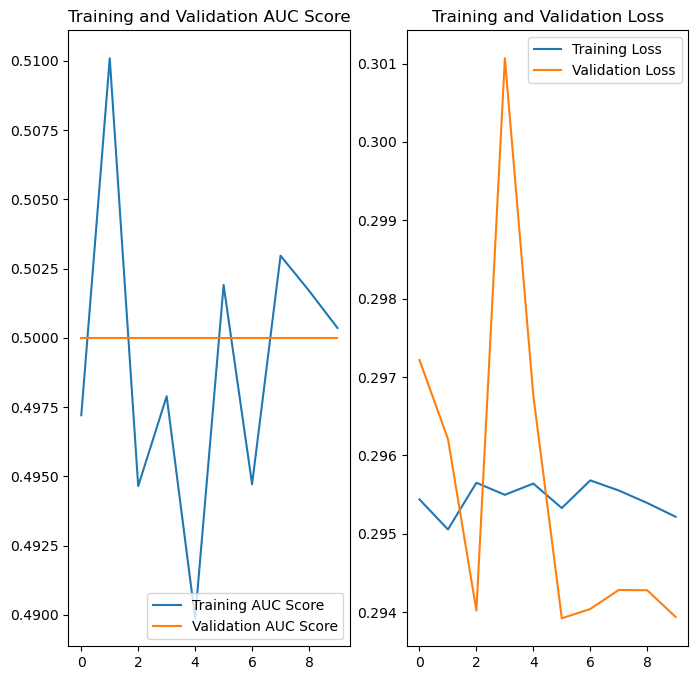

In [52]:
acc = history.history['auc_2']
val_acc = history.history['val_auc_2']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

import kerastuner as kt

In [63]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=[80]))
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')]

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)

  return model

In [64]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=5)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [65]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_recall', patience=5)

In [66]:
tuner.search(X_train.values, y_train, epochs=30, validation_data = (X_test.values, y_test), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 5 Complete [00h 02m 42s]
val_loss: 0.19685709476470947

Best val_loss So Far: 0.19685709476470947
Total elapsed time: 00h 08m 05s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 288 and the optimal learning rate for the optimizer
is 0.001.



Building the model as per keras tuner

In [70]:
model = Sequential()
model.add(Dense(288,input_shape = (80,),
                activation='relu',
                kernel_initializer='uniform'))
model.add(Dense(288 ,
                activation= 'relu'))
model.add(Dense(1,
                activation = 'relu'))


In [71]:
metrics = [
    keras.metrics.Precision(name = "precision"),
    keras.metrics.Recall(name = 'recall'),
    keras.metrics.AUC(curve = 'ROC'),
]

model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss= 'binary_crossentropy',
    metrics =  metrics
)

In [74]:
epochs = 10
batch_size = 32

history = model.fit(X_train.values,y_train, validation_data=(X_test.values,y_test),epochs = epochs,batch_size = batch_size)

Epoch 1/10
   1/2150 [..............................] - ETA: 34s - loss: 0.7015 - precision: 0.3333 - recall: 0.2000 - auc_2: 0.7815

InvalidArgumentError: Graph execution error:

Detected at node 'assert_less_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "d:\programs\Anaconda\envs\new\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "d:\programs\Anaconda\envs\new\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "d:\programs\Anaconda\envs\new\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "d:\programs\Anaconda\envs\new\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "d:\programs\Anaconda\envs\new\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "d:\programs\Anaconda\envs\new\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "d:\programs\Anaconda\envs\new\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "d:\programs\Anaconda\envs\new\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\programs\Anaconda\envs\new\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\abhis\AppData\Local\Temp\ipykernel_21664\1198550097.py", line 4, in <module>
      history = model.fit(X_train.values,y_train, validation_data=(X_test.values,y_test),
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\engine\compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\metrics\metrics.py", line 818, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "d:\programs\Anaconda\envs\new\lib\site-packages\keras\utils\metrics_utils.py", line 606, in update_confusion_matrix_variables
      tf.debugging.assert_less_equal(
Node: 'assert_less_equal/Assert/AssertGuard/Assert'
assertion failed: [predictions must be <= 1] [Condition x <= y did not hold element-wise:] [x (sequential_2/dense_10/Relu:0) = ] [[0][0][0]...] [y (Cast_4/x:0) = ] [1]
	 [[{{node assert_less_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_886861]